# Agenda: Data Wrangling & Visualization
- 20 min: **How to visualize data in Manhattan plot**
    - What are Manhattan plots and why are they useful for identifying associations of interest? 
- 50 min: **Create your own Manhattan plot using GWAS catalogue p-values**
- 10 min: **What are QQ plots?**
    - why QQ plots are useful for identifying violations in your data, such as stratification.

## Extra Material
- **Data wrangling: typical choices and why**
    - This is in the extra material notebook for Day5_C
 
## Resources
For some background information about GWAS and Manhattan plots, check out our [Manhattan Plots ebook](https://rise.articulate.com/share/ErI_Z_5LtpyE3NGxuApu0HYmU99Xy5gX#/).

# Manhattan Plots

---

A type of scatterplot where X is the position of the genomic variant (usually the position across each of the chromosomes ordered from 1 to 22/XY across the genome) and Y is the p-value of the variant with respect to the targeted phenotype. 


## Simulated Data Example

We will recreate one with simulated data below using the pipeline: 

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint
import seaborn as sns

C:\Users\entro\AppData\Local\Temp\ipykernel_18112\2283150910.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(('chromosome'))


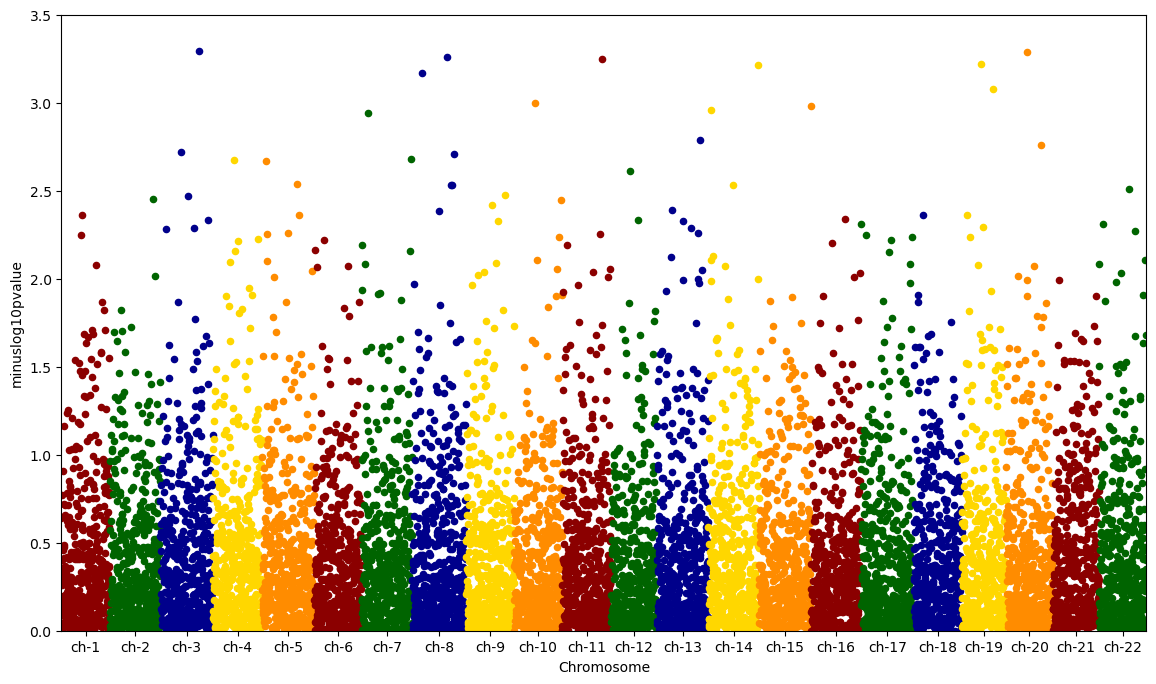

In [4]:
# Method 1 was found here: https://python-graph-gallery.com/manhattan-plot-with-matplotlib/
# sample data
df = pd.DataFrame({'gene' : ['gene-%i' % i for i in np.arange(10000)],'pvalue' : uniform.rvs(size=10000),
                'chromosome' : ['ch-%i' % i for i in randint.rvs(1,23,size=10000)]})

# -log_10(pvalue)
df['minuslog10pvalue'] = -np.log10(df.pvalue)
df.chromosome = df.chromosome.astype('category')
df.chromosome = df.chromosome.cat.set_categories(['ch-%i' % i for i in range(1,23)], ordered=True)
df = df.sort_values('chromosome')

# How to plot gene vs. -log10(pvalue) and colour it by chromosome?
df['ind'] = range(len(df))
df_grouped = df.groupby(('chromosome'))

# manhattan plot
fig = plt.figure(figsize=(14, 8)) # Set the figure size
ax = fig.add_subplot(111)
colors = ['darkred','darkgreen','darkblue', 'gold','darkorange']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='ind', y='minuslog10pvalue',color=colors[num % len(colors)], ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
ax.set_xlim([0, len(df)])
ax.set_ylim([0, 3.5])

# x axis label
ax.set_xlabel('Chromosome')

# show the graph
plt.show()

above plot: 
points
*  are -log_10(p-values) of chisq-test for an individual snp

In [ ]:
# This method is taken from here: https://stackoverflow.com/questions/37463184/how-to-create-a-manhattan-plot-with-matplotlib-in-python
# Simulate DataFrame
df = pd.DataFrame({
'rsid'  : ['rs{}'.format(i) for i in np.arange(10000)],
'chrom' : [i for i in randint.rvs(1,23+1,size=10000)],
'pos'   : [i for i in randint.rvs(0,10**5,size=10000)],
'pval'  : uniform.rvs(size=10000)})
df['-logp'] = -np.log10(df.pval); df = df.sort_values(['chrom','pos'])
df.reset_index(inplace=True, drop=True); df['i'] = df.index

# Generate Manhattan plot: (#optional tweaks for relplot: linewidth=0, s=9)
plot = sns.relplot(data=df, x='i', y='-logp', aspect=3.7, 
                   hue='chrom', palette = 'bright', legend=None) 
chrom_df=df.groupby('chrom')['i'].median()
plot.ax.set_xlabel('chrom'); plot.ax.set_xticks(chrom_df);
plot.ax.set_xticklabels(chrom_df.index)

## Moving on to 'real' data

Data from [Genome-wide association analyses of risk tolerance and risky behaviors in over 1 million individuals identify hundreds of loci and shared genetic influences](https://www.nature.com/articles/s41588-018-0309-3) by Karlsson Linnér et al. (2019).

In [5]:
# Pipeline taken from here: https://github.com/mojones/video_notebooks/blob/master/Manhattan%20plots%20in%20Python.ipynb
# read in the data
# 11514463 rows × 9 columns so this will take a moment!
df1=pd.read_csv('AUTOMOBILE_SPEEDING_PROPENSITY_GWAS.txt', sep='\t')

# This will take much longer (up to 10 min) but if you don't have the file saved locally, you can use the following instead!
# df1=pd.read_csv('https://ftp.ebi.ac.uk/pub/databases/gwas/summary_statistics/GCST007001-GCST008000/GCST007329/AUTOMOBILE_SPEEDING_PROPENSITY_GWAS.txt', sep='\t')

In [6]:
df1.head()

,MarkerName,CHR,POS,A1,A2,EAF_A1,Beta,SE,Pval
0,rs114608975,1,86028,T,C,0.908392,-0.00365,0.00370,0.32310
1,rs12238997,1,693731,A,G,0.877949,0.00420,0.00352,0.23300
2,rs4565649,1,713092,A,G,0.006237,-0.03358,0.02521,0.18280
3,rs149887893,1,714596,T,C,0.962227,0.01195,0.00637,0.06064
4,rs141090730,1,715205,C,G,0.993317,0.03074,0.02521,0.22300


In [7]:
# Adding a column to the table that is a -log of the p-values
df1['-logp'] = - np.log(df1['Pval'])
df1

,MarkerName,CHR,POS,A1,A2,EAF_A1,Beta,SE,Pval,-logp
0,rs114608975,1,86028,T,C,0.908392,-0.00365,0.00370,0.32310,1.129793
1,rs12238997,1,693731,A,G,0.877949,0.00420,0.00352,0.23300,1.456717
2,rs4565649,1,713092,A,G,0.006237,-0.03358,0.02521,0.18280,1.699363
3,rs149887893,1,714596,T,C,0.962227,0.01195,0.00637,0.06064,2.802801
4,rs141090730,1,715205,C,G,0.993317,0.03074,0.02521,0.22300,1.500584
...,...,...,...,...,...,...,...,...,...,...
11514458,rs9616985,22,51229805,T,C,0.923606,-0.00428,0.00433,0.32310,1.129793
11514459,rs539541647,22,51231424,A,G,0.999399,-0.00469,0.03126,0.88080,0.126925
11514460,NaN,22,51234033,T,C,0.000416,0.00947,0.03254,0.77140,0.259548
11514461,rs3896457,22,51237063,T,C,0.714244,-0.00018,0.00246,0.94040,0.061450


In [8]:
# adding a second new column that keeps track of the position of the variant
running_pos = 0

cumulative_pos = []

for chrom, group_df in df1.groupby('CHR'):  
    cumulative_pos.append(group_df['POS'] + running_pos)
    running_pos += group_df['POS'].max()
    
df1['cumulative_pos'] = pd.concat(cumulative_pos)

df1
# and adding another column that keeps track of the index number (counts the SNP)
df1['SNP number'] = df1.index

df1

,MarkerName,CHR,POS,A1,A2,EAF_A1,Beta,SE,Pval,-logp,cumulative_pos,SNP number
0,rs114608975,1,86028,T,C,0.908392,-0.00365,0.00370,0.32310,1.129793,86028,0
1,rs12238997,1,693731,A,G,0.877949,0.00420,0.00352,0.23300,1.456717,693731,1
2,rs4565649,1,713092,A,G,0.006237,-0.03358,0.02521,0.18280,1.699363,713092,2
3,rs149887893,1,714596,T,C,0.962227,0.01195,0.00637,0.06064,2.802801,714596,3
4,rs141090730,1,715205,C,G,0.993317,0.03074,0.02521,0.22300,1.500584,715205,4
...,...,...,...,...,...,...,...,...,...,...,...,...
11514458,rs9616985,22,51229805,T,C,0.923606,-0.00428,0.00433,0.32310,1.129793,2879361236,11514458
11514459,rs539541647,22,51231424,A,G,0.999399,-0.00469,0.03126,0.88080,0.126925,2879362855,11514459
11514460,NaN,22,51234033,T,C,0.000416,0.00947,0.03254,0.77140,0.259548,2879365464,11514460
11514461,rs3896457,22,51237063,T,C,0.714244,-0.00018,0.00246,0.94040,0.061450,2879368494,11514461


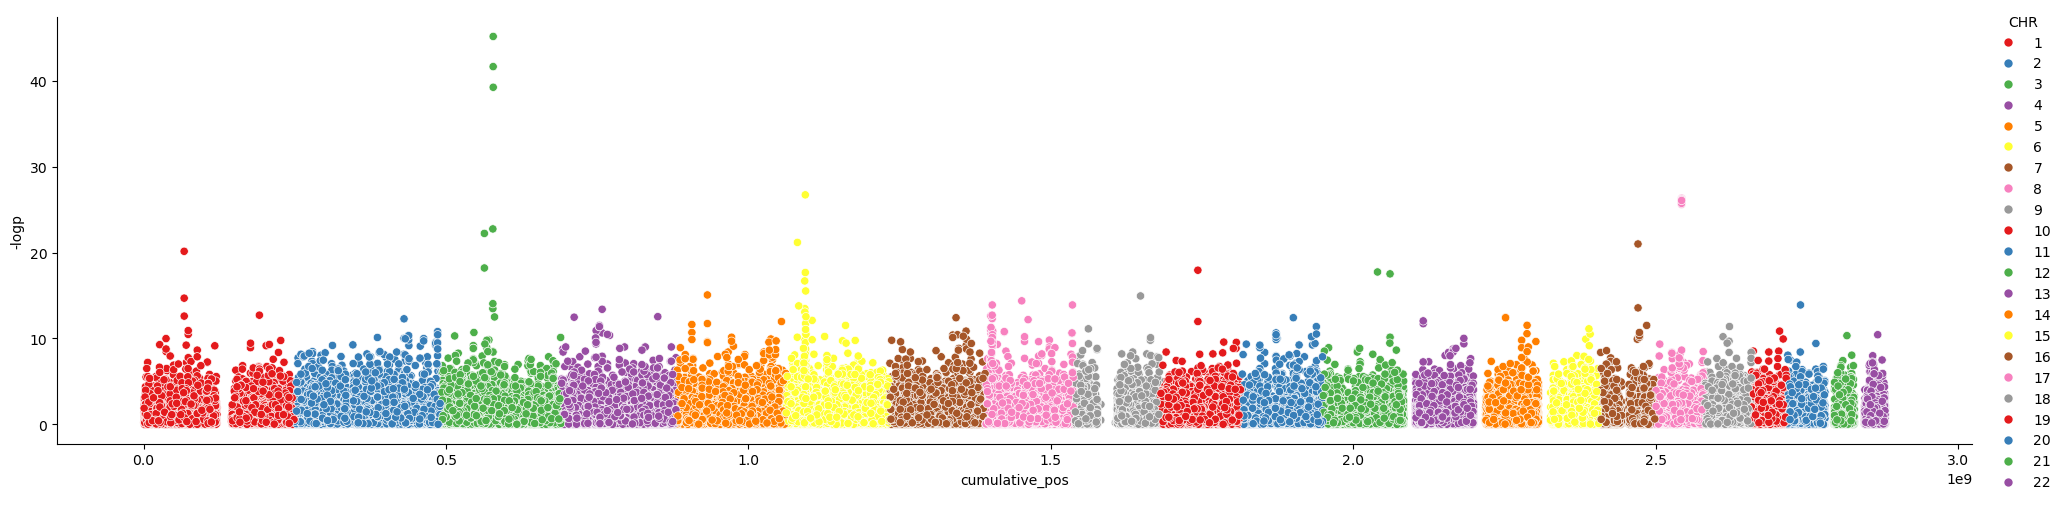

In [9]:
# now the data is in the form we want it to be in so we can use seaborn to plot
%matplotlib inline

sns.relplot(
    data = df1.sample(100000), # using a sample of 100000 will ensure that the plot is produced faster. You can play around with this number
    x = 'cumulative_pos',
    y = '-logp',
    aspect = 4,
    hue = 'CHR',
    palette = 'Set1'
)

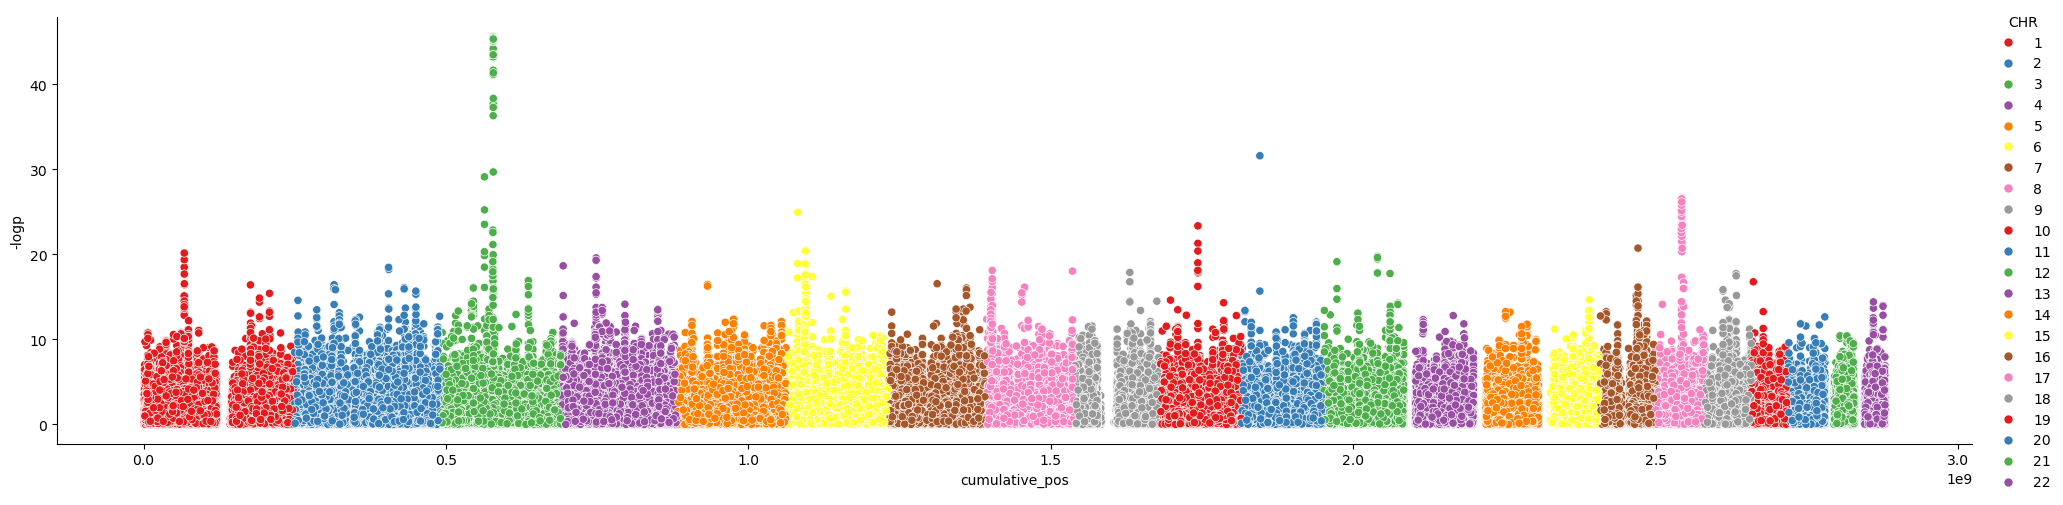

In [10]:
# now the data is in the form we want it to be in so we can use seaborn to plot
%matplotlib inline

sns.relplot(
    data = df1.sample(1000000), # using a sample of 100000 will ensure that the plot is produced faster. You can play around with this number
    x = 'cumulative_pos',
    y = '-logp',
    aspect = 4,
    hue = 'CHR',
    palette = 'Set1'
)

In [ ]:
# similar plot but uses the SNP number (which is just the index) instead of cumulative_pos, but these similar specifiers
sns.relplot(
    data = df1.sample(100000),
    x = 'SNP number',
    y = '-logp',
    aspect = 4,
    hue = 'CHR',
    palette = 'Set1'
)

In [ ]:
# Now we will play around with the parameters: 
g = sns.relplot(
    data = df1.sample(100000),
    x = 'cumulative_pos',
    y = '-logp',
    aspect = 4,
    hue = 'CHR',
    palette = 'Set1',
    linewidth=0,
    s=6,
    legend=None
)

g.ax.set_xlabel('Chromosome')
# some chromosomes are larger and contain more variants than others so the tick needs to be in the median of the position
g.ax.set_xticks(df1.groupby('CHR')['cumulative_pos'].median())

g.ax.set_xticklabels(df1['CHR'].unique())
g.ax.axhline(12, linestyle='--', linewidth=1)
g.fig.suptitle('GWAS plot showing association between SNPs on autosomes and speeding')
plt.savefig("Manhattan_plot.png")

In [ ]:
# Now we will play around with the parameters: 
g = sns.relplot(
    data = df1.sample(100000),
    x = 'cumulative_pos',
    y = '-logp',
    aspect = 4,
    hue = 'CHR',
    palette = 'Set1',
    linewidth=0,
    s=6,
    legend=None
)

g.ax.set_xlabel('Chromosome')
# some chromosomes are larger and contain more variants than others so the tick needs to be in the median of the position
g.ax.set_xticks(df1.groupby('CHR')['cumulative_pos'].median())

g.ax.set_xticklabels(df1['CHR'].unique())
g.ax.axhline(12, linestyle='--', linewidth=1)
g.fig.suptitle('GWAS plot showing association between SNPs on autosomes and speeding')
plt.savefig("Manhattan_plot.png")

In [ ]:
# you could highlight chromosomes or even just part of a chromosome
# we only care about part of chromosome 6 in this example: 
df1['color group'] = df1['CHR'].apply(lambda x : 'A' if x % 2 == 0 else 'B')
df1.loc[(df1['CHR'] == 6) & (df1['POS'] < 50000000), 'color group'] = 'C'

g = sns.relplot(
    data = df1.sample(100000),
    x = 'cumulative_pos',
    y = '-logp',
    aspect = 4,
    hue = 'color group',
    palette = ['red', 'pink', 'blue'],
    linewidth=0,
    s=6,
    legend=None
)

g.ax.set_xlabel('Chromosome')

g.ax.set_xticks(df1.groupby('CHR')['cumulative_pos'].median())

g.ax.set_xticklabels(df1['CHR'].unique())

g.fig.suptitle('GWAS plot showing association between SNPs on autosomes and speeding with an emphasis on first part of chromosome 6')


# Introduction to the GWAS catalogue

---

From [EMBL-EBI](https://www.ebi.ac.uk/training/online/courses/gwas-catalogue-exploring-snp-trait-associations/what-is-gwas-catalog/):
> The NHGRI-EBI GWAS Catalog is a publicly available resource of Genome Wide Association Studies (GWAS) and their results. It was originally founded in 2008 by the National Human Genome Research Institute (NHGRI), and since 2010 has been a collaboration between the EBI and the NHGRI.

The big diagram: https://www.ebi.ac.uk/gwas/diagram


## Investigating human genome variants

Every pair will be assigned one. Note: These variants were chosen because they are common variants and they have medium-to-large effects. This is an unusual combination so don't be fooled into thinking that you will generally find this!

[Multifactorial Inheritance](https://www.nature.com/scitable/topicpage/multifactorial-inheritance-and-genetic-disease-919/)

![](https://raw.githubusercontent.com/awnorowski/BDSiC_2025/refs/heads/main/images/EffectSizeAllele.png)

To **demonstrate** the pipeline we will use: 

### Example: Vitamin D levels (25(OH)D serum concentration) 
Only a few SNPs with high explanatory power:  GC (DBP), CYP2R1, DHCR7/NADSYN1

          P-VALUE  CHR_ID    CHR_POS  -log10(p)
572  3.000000e-18     1.0  2395373.0  17.522879
655  5.000000e-10     1.0  2395373.0   9.301030
138  9.000000e-10     1.0  2398222.0   9.045757
398  3.000000e-12     1.0  2407700.0  11.522879
466  8.000000e-14     1.0  2407700.0  13.096910
          P-VALUE  CHR_ID    CHR_POS  -log10(p)  cumulative_pos
572  3.000000e-18     1.0  2395373.0  17.522879       2395373.0
655  5.000000e-10     1.0  2395373.0   9.301030       2395373.0
138  9.000000e-10     1.0  2398222.0   9.045757       2398222.0
398  3.000000e-12     1.0  2407700.0  11.522879       2407700.0
466  8.000000e-14     1.0  2407700.0  13.096910       2407700.0
          P-VALUE  CHR_ID     CHR_POS  -log10(p)  cumulative_pos
679  8.000000e-12    22.0  31139886.0  11.096910    2.563783e+09
561  2.000000e-10    22.0  40831082.0   9.698970    2.573475e+09
89   2.000000e-09    22.0  40997516.0   8.698970    2.573641e+09
390  3.000000e-09    22.0  50414705.0   8.522879    2.583058e+09
562

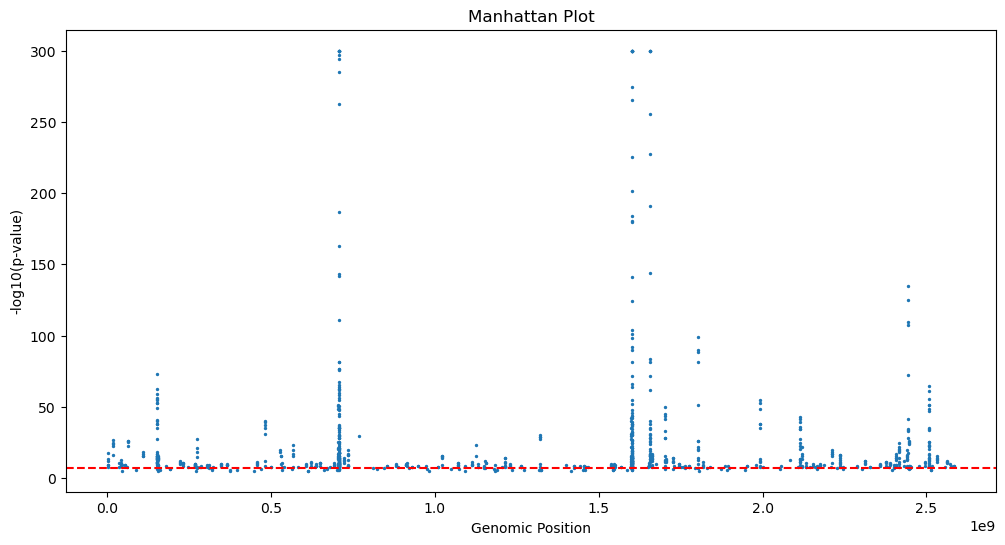

In [ ]:
# We have used Vitamin D levels to get p-values across studies and across multiple ancestry populations. 
# you can visualize the Manhattan Plot by using LocusZoom button, but we are going to do this by code

# Load summary stats file
df = pd.read_csv('https://raw.githubusercontent.com/awnorowski/BDSiC_2025/refs/heads/main/data/gwas-association-Vitamin-D.csv')
#df
# Drop NaNs and filter out extreme p-values
df1 = df.dropna(subset=['P-VALUE', 'CHR_ID', 'CHR_POS'])
df1=df1[['P-VALUE', 'CHR_ID', 'CHR_POS']]
df1
df1 = df1[df1['P-VALUE'] > 0]  # avoid -log10(0)
df1.head()

# Create -log10(p) column
df1['-log10(p)'] = -np.log10(df1['P-VALUE'])
df1.head()

# Convert chromosomes to numeric for plotting
df1 = df1.sort_values(['CHR_ID', 'CHR_POS'])
print(df1.head())

# Compute cumulative base pair position
running_pos = 0
cumulative_pos = []
for chrom, group_df in df1.groupby('CHR_ID'):  
    cumulative_pos.append(group_df['CHR_POS'] + running_pos)
    running_pos += group_df['CHR_POS'].max()

df1['cumulative_pos'] = pd.concat(cumulative_pos)

print(df1.head())
print(df1.tail())

# Manhattan plot
plt.figure(figsize=(12,6))
plt.scatter(df1['cumulative_pos'], df1['-log10(p)'], s=2)
plt.axhline(y=7.3, color='red', linestyle='--')  # genome-wide threshold ~5e-8
plt.xlabel('Genomic Position')
plt.ylabel('-log10(p-value)')
plt.title('Manhattan Plot')
plt.show()

## Analysis Practice

For your assigned gene, please answer/complete the following using the [GWAS catalogue data](https://www.ebi.ac.uk/gwas/home): 
1. How many associations and studies does this trait have?
    * 1161
2. Is the information given to you confirmed by the information listed for this trait?
    * "Limited polygenicity; only a few genome-wide significant hits: PAX8, VRK2, ABCC9"
3. What region and SNP is most significantly associated with your trait?
4. Is the variant most significantly associated with your trait, associated with any other trait(s)?
5. Download Associations - this will give you a tsv file that contains p-values (that you will use to construct a Manhattan plot).
6. Generate a Manhattan plot!
 

### 1. Lactase Persistence (LCT)
**Search for:** lactase-phlorizin hydrolase measurement  
**Notes:**  
SNP: rs4988235  
Location: Upstream of the LCT gene on chromosome 2q21.  
Trait: Lactase persistence in adults (ability to digest lactose).  
Effect Size: Large effect in populations with historical dairy farming.  
Mechanism: A regulatory variant that increases expression of the LCT gene.  


### 2. Alzheimer's Disease and APOE
**Search for:** Alzheimer disease  
**Notes:**  
SNPs: rs429358 (C) and rs7412 (T) define the APOE ε4 allele.  
Location: APOE gene on chromosome 19q13.2.  
Trait: Late-onset Alzheimer’s disease.  
Effect Size: Medium to large; ε4 allele increases risk significantly compared to ε3.  
Mechanism: Alters lipid transport and amyloid-beta metabolism.  

### 3. Skin pigmentation in non-African Populations (especially Freckles, Red Hair and Fair Skin (MC1R))
**Search for:** freckles, hair color, OR skin sensitivity to sun  
**Notes:**  
Moderately polygenic, but only a few loci account for most variation: SLC24A5, SLC45A2, TYR, OCA2, MC1R  

### 4. Serum urate levels (linked to gout risk)
**Search for:** urate measurement  
**Notes:**  
Common, heritable trait with ~10 major loci:  SLC2A9, ABCG2, SLC22A12, GCKR  

### 5. Alcohol Flush Reaction
**Search for:** trait in response to ethanol  
**Notes:**  
Complex response, driven by more than one variant but still low complexity: ALDH2, ADH1B, ADH1C  

### 6. Plasma lipid levels (e.g., LDL cholesterol)
**Search for:** lipid measurement OR low density lipoprotein cholesterol measurement  
**Notes:**  
Well-studied with 5–10 major SNPs explaining large variance:  APOB, PCSK9, LDLR, CELSR2  

### 7. Warfarin Sensitivity (VKORC1/CYP2C9)
**Search for:** response to anticoagulant  
**Notes:**  
SNPs: rs9923231 (VKORC1) and rs1057910 (CYP2C9).  
Location: VKORC1 on chromosome 16p11.2 and CYP2C9 on chromosome 10q23.33.  
Trait: Sensitivity to warfarin (anticoagulant).  
Effect Size: Medium to large; significant impact on dosing.  
Mechanism: Affects drug metabolism and vitamin K recycling.  

### 8. Sleep duration (habitual)
**Search for:** sleep duration trait  
**Notes:**  
Limited polygenicity; only a few genome-wide significant hits: PAX8, VRK2, ABCC9  

          P-VALUE  CHR_ID    CHR_POS  -log10(p)
163  2.000000e-06     1.0  5446532.0   5.698970
164  2.000000e-07     1.0  5471071.0   6.698970
165  1.000000e-05     1.0  5668879.0   5.000000
166  9.000000e-06     1.0  5689184.0   5.045757
264  9.000000e-07     1.0  6810798.0   6.045757
          P-VALUE  CHR_ID    CHR_POS  -log10(p)  cumulative_pos
163  2.000000e-06     1.0  5446532.0   5.698970       5446532.0
164  2.000000e-07     1.0  5471071.0   6.698970       5471071.0
165  1.000000e-05     1.0  5668879.0   5.000000       5668879.0
166  9.000000e-06     1.0  5689184.0   5.045757       5689184.0
264  9.000000e-07     1.0  6810798.0   6.045757       6810798.0
          P-VALUE  CHR_ID     CHR_POS  -log10(p)  cumulative_pos
649  3.000000e-08    22.0  41940168.0   7.522879    2.747071e+09
160  5.000000e-06    22.0  42733355.0   5.301030    2.747864e+09
136  3.000000e-07    22.0  43735438.0   6.522879    2.748866e+09
161  6.000000e-07    22.0  46775446.0   6.221849    2.751906e+09
162

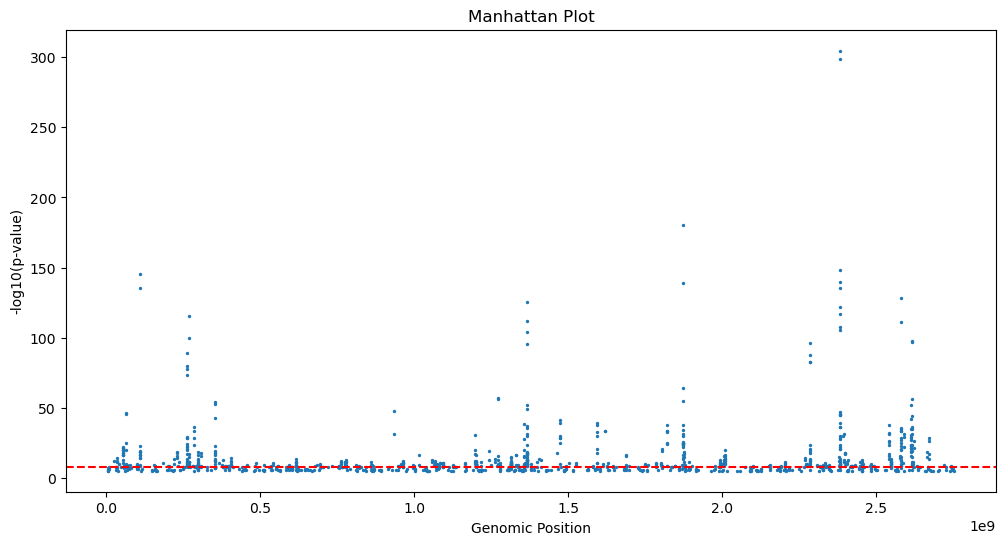

In [11]:
# We have used Vitamin D levels to get p-values across studies and across multiple ancestry populations. 
# you can visualize the Manhattan Plot by using LocusZoom button, but we are going to do this by code

# Load summary stats file
df = pd.read_csv('gwas-association-downloaded_2025-05-30-OBA_2040171.tsv', sep = '\t')
#df
# Drop NaNs and filter out extreme p-values
df1 = df.dropna(subset=['P-VALUE', 'CHR_ID', 'CHR_POS'])
df1=df1[['P-VALUE', 'CHR_ID', 'CHR_POS']]
df1
df1 = df1[df1['P-VALUE'] > 0]  # avoid -log10(0)
df1.head()
# Create -log10(p) column
df1['-log10(p)'] = -np.log10(df1['P-VALUE'])
df1.head()

# Convert chromosomes to numeric for plotting
df1 = df1.sort_values(['CHR_ID', 'CHR_POS'])
print(df1.head())

# Compute cumulative base pair position
running_pos = 0
cumulative_pos = []
for chrom, group_df in df1.groupby('CHR_ID'):  
    cumulative_pos.append(group_df['CHR_POS'] + running_pos)
    running_pos += group_df['CHR_POS'].max()

df1['cumulative_pos'] = pd.concat(cumulative_pos)

print(df1.head())
print(df1.tail())

# Manhattan plot
plt.figure(figsize=(12,6))
plt.scatter(df1['cumulative_pos'], df1['-log10(p)'], s=2)
plt.axhline(y=7.3, color='red', linestyle='--')  # genome-wide threshold ~5e-8
plt.xlabel('Genomic Position')
plt.ylabel('-log10(p-value)')
plt.title('Manhattan Plot')
plt.show()

In [15]:
df1.sort_values(by='-log10(p)').head()


,P-VALUE,CHR_ID,CHR_POS,-log10(p),cumulative_pos
150,0.000009,1.0,45042634.0,5.045757,4.504263e+07
453,0.000009,2.0,127749998.0,5.045757,3.741034e+08
457,0.000009,2.0,25245601.0,5.045757,2.715990e+08
458,0.000008,12.0,100934983.0,5.096910,1.806905e+09
455,0.000008,7.0,135330794.0,5.096910,1.183706e+09


# QQ Plot

---

> "The QQ plot is a graphical representation of the deviation of the observed P values from the null hypothesis: the observed P values for each SNP are sorted from largest to smallest and plotted against expected values from a theoretical χ2-distribution."

The null hypothesis is that the p-values are uniformly distributed. That is: there will be a uniform distribution of false positives, and actual p-values, across the entire genome. 

If the observed p-values are not aligned on the null hypothesis, then there is an issue in the data. Likely, with GWAS data, there is population stratification which is a problem. 

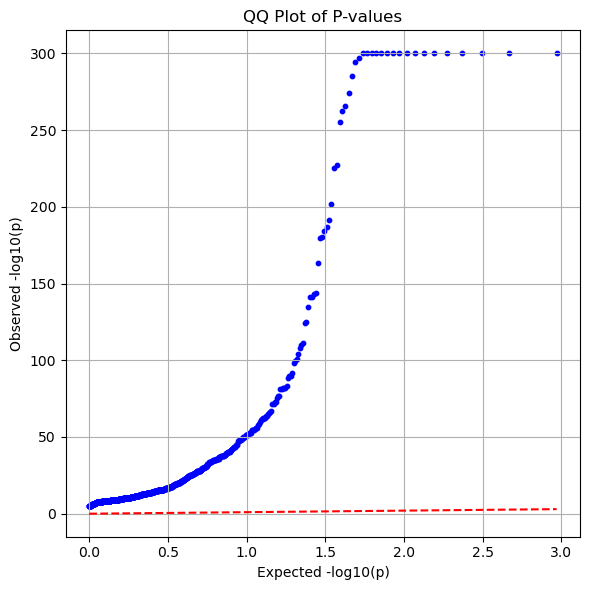

In [17]:
# This was generated with a LLM. 
# there are many packages that are specific to GWAS, but I did not want to have you download them. 
# I wanted to use the primary DS libraries only. 
def qq_plot(p_values, title='QQ Plot of P-values'):
    """
    Generate a QQ plot for p-values from a genetic association study.

    Parameters:
        p_values (array-like): Array or list of p-values.
        title (str): Title for the plot.
    """
    p_values = np.array(p_values)
    p_values = p_values[~np.isnan(p_values)]  # remove NaNs
    p_values = np.sort(p_values)
    n = len(p_values)
    
    expected = -np.log10(np.linspace(1/n, 1, n)) # simulating uniform -log10 values
    observed = -np.log10(p_values) # converting the Pval column that we passed into the function into -log10

    plt.figure(figsize=(6, 6))
    plt.scatter(expected, observed, c='blue', s=10)
    plt.plot([0, max(expected)], [0, max(expected)], color='red', linestyle='--')
    plt.xlabel('Expected -log10(p)')
    plt.ylabel('Observed -log10(p)')
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
p_values = df1['P-VALUE']
qq_plot(p_values)


To help understand what is going on here, this is an [excellent reference](https://pmc.ncbi.nlm.nih.gov/articles/PMC2865585/#:~:text=The%20QQ%20plot%20is%20a,a%20theoretical%20%CF%872%2Ddistribution) 

The strange shape is because we are using a file that is enriched for significant P-values, rather than one which contains all the Pvalues for all SNPS (significant or not) across the genome. 
